 Dataset Generated
Shape: (2300, 15)

First 5 rows:
   Feature_01  Feature_02  Feature_03  Feature_04  Feature_05  Feature_06  \
0   12.701364    2.894971    9.869911   -1.967951   -6.856674   -0.216079   
1    0.911204    2.382234   -3.144998   -4.531073    3.594994    3.523616   
2    0.136262   -1.251358   -0.059623   -5.205145    4.736733    0.383580   
3   11.359249    4.590783    7.852281   -1.404672   -4.972175   -2.825863   
4   -3.981214    0.011930   -6.982824    0.119808   -0.908839    1.125556   

   Feature_07  Feature_08  Feature_09  Feature_10  Feature_11  Feature_12  \
0   -7.986856    6.092737   -0.710461    9.777670    2.448446    5.439796   
1    2.982826   -1.322963    2.913652   -1.781954   -2.646228    9.462859   
2    1.271212   -1.055264    1.615877   -8.345869   -9.366693   -4.145617   
3   -4.577210    1.155168   -3.167168    4.187568   -7.088677   -1.098089   
4   -7.322983   -0.190865    0.170479    7.658674   -2.043447    4.774076   

   Feature_13  Feature

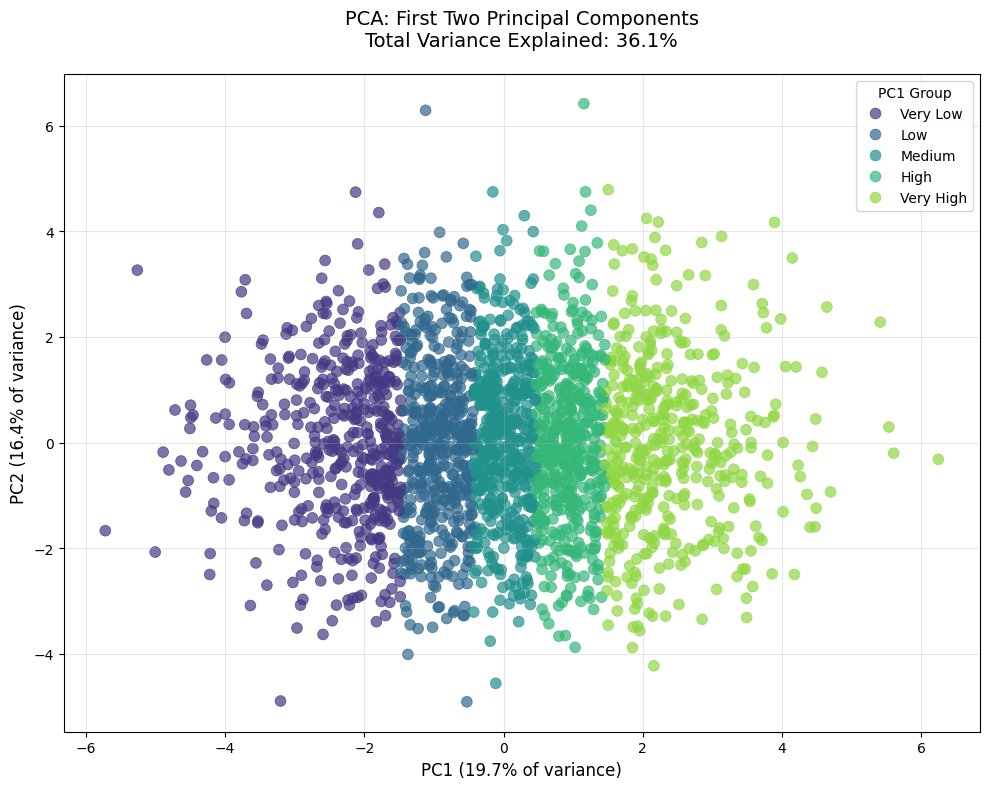


 Loadings (Feature Contributions to PCs):
            PC1_Loading  PC2_Loading
Feature_01       -0.324        0.202
Feature_02       -0.022        0.346
Feature_03       -0.298        0.110
Feature_04       -0.331        0.226
Feature_05       -0.127       -0.301
Feature_06        0.423        0.003
Feature_07       -0.228       -0.345
Feature_08       -0.305        0.114
Feature_09        0.262       -0.140
Feature_10        0.196        0.275
Feature_11        0.206        0.234
Feature_12       -0.091       -0.259
Feature_13        0.319        0.245
Feature_14        0.159        0.294
Feature_15       -0.267        0.436

 Interpretation:
PC1 is primarily influenced by: ['Feature_06', 'Feature_04', 'Feature_01']
PC2 is primarily influenced by: ['Feature_15', 'Feature_02', 'Feature_07']


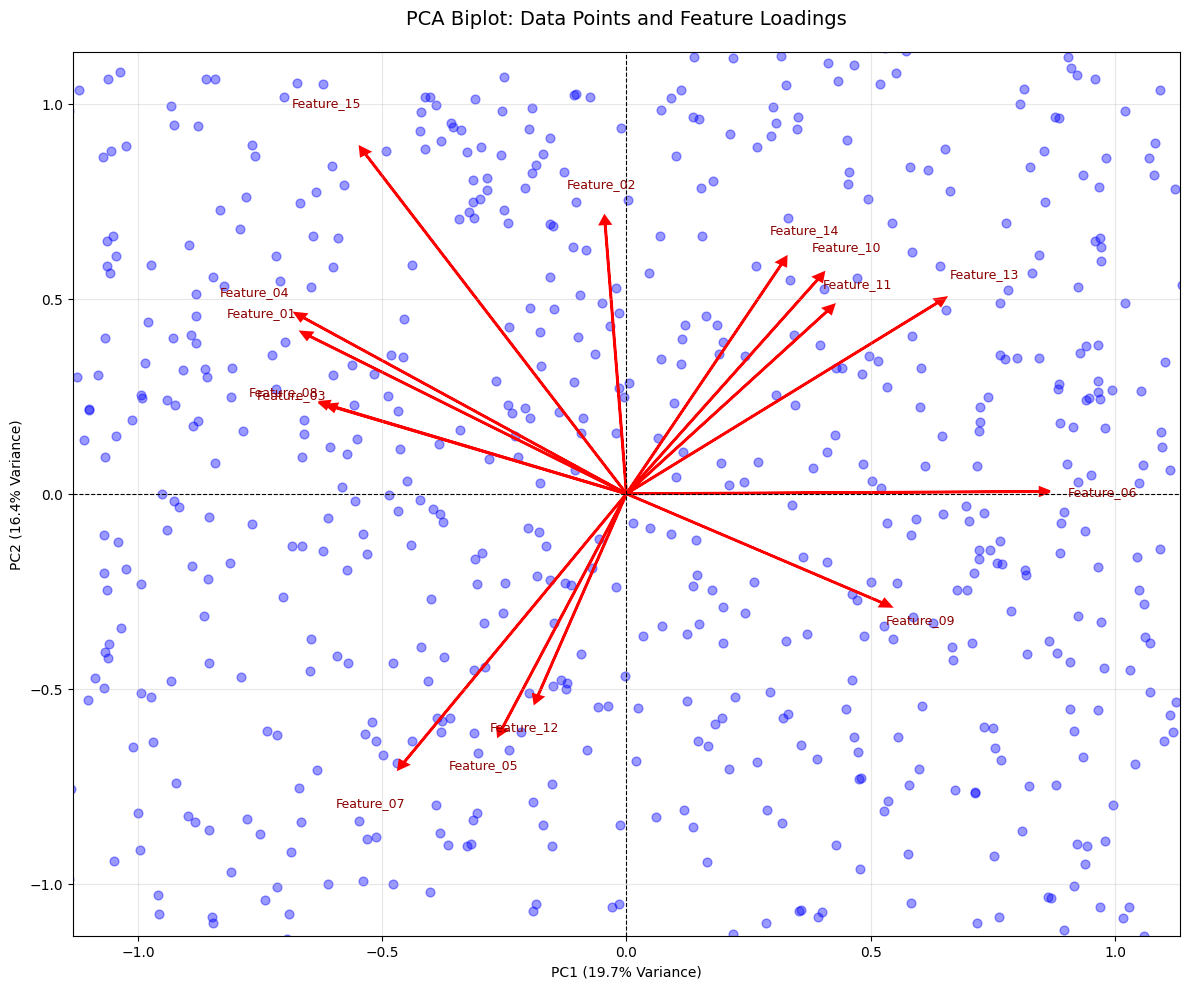

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Set style and seed
plt.style.use('default')
sns.set_palette("Set2")
np.random.seed(42)

# --------------------------------------------------
# Step 1: Generate Dataset (2300 rows, 15 columns)
# --------------------------------------------------
n_samples = 2300
n_features = 15

# Create correlated features using multivariate normal
mean = np.random.uniform(-3, 3, n_features)
cov = np.random.randn(n_features, n_features)
cov = np.dot(cov, cov.T)  # Make positive semi-definite

data = np.random.multivariate_normal(mean, cov, size=n_samples)
df = pd.DataFrame(data, columns=[f'Feature_{i+1:02d}' for i in range(n_features)])

print(" Dataset Generated")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

# --------------------------------------------------
# Step 2: Standardize the Data
# --------------------------------------------------
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
print(f"\n Data standardized (mean=0, std=1)")

# --------------------------------------------------
# Step 3: Apply PCA (Reduce to 2D)
# --------------------------------------------------
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# Create a DataFrame for easy plotting
pc_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])

# Optional: Add a grouping variable (e.g., based on PC1 quantiles)
pc_df['Group'] = pd.qcut(pc_df['PC1'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

print(f"\n PCA completed. Transformed to 2D: {pc_df.shape}")

# --------------------------------------------------
# Step 4: Explained Variance
# --------------------------------------------------
explained_variance = pca.explained_variance_ratio_
total_variance = sum(explained_variance)

print(f"\n Variance Explained by Principal Components:")
print(f"PC1: {explained_variance[0]:.3f} ({explained_variance[0]*100:.1f}%)")
print(f"PC2: {explained_variance[1]:.3f} ({explained_variance[1]*100:.1f}%)")
print(f"Total (PC1 + PC2): {total_variance:.3f} ({total_variance*100:.1f}%)")

# --------------------------------------------------
# Step 5: Scatter Plot of First Two PCs
# --------------------------------------------------
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(
    data=pc_df, x='PC1', y='PC2',
    hue='Group', palette='viridis', alpha=0.7, s=60, edgecolor=None
)
plt.title(f'PCA: First Two Principal Components\n'
          f'Total Variance Explained: {total_variance*100:.1f}%', fontsize=14, pad=20)
plt.xlabel(f'PC1 ({explained_variance[0]*100:.1f}% of variance)', fontsize=12)
plt.ylabel(f'PC2 ({explained_variance[1]*100:.1f}% of variance)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title='PC1 Group', loc='best')
plt.tight_layout()
plt.show()

# --------------------------------------------------
# Step 6: Feature Loadings (Interpretation of PCs)
# --------------------------------------------------
loadings = pca.components_.T  # Shape: (15 features, 2 PCs)
loading_df = pd.DataFrame(
    loadings,
    columns=['PC1_Loading', 'PC2_Loading'],
    index=df.columns
)

print(f"\n Loadings (Feature Contributions to PCs):")
print(loading_df.round(3))

# Top contributors to each PC
top_pc1 = loading_df['PC1_Loading'].abs().nlargest(3).index
top_pc2 = loading_df['PC2_Loading'].abs().nlargest(3).index

print(f"\n Interpretation:")
print(f"PC1 is primarily influenced by: {list(top_pc1)}")
print(f"PC2 is primarily influenced by: {list(top_pc2)}")

# --------------------------------------------------
# Step 7: Biplot (Scores + Loading Vectors)
# --------------------------------------------------
def biplot(pca, pc_df, loading_df, scale_factor=2.0, figsize=(12, 10)):
    """
    Biplot: Shows data points (scores) and feature vectors (loadings).
    """
    fig, ax = plt.subplots(figsize=figsize)

    # Plot data points
    ax.scatter(
        pc_df['PC1'], pc_df['PC2'],
        color='blue', alpha=0.4, s=40, label='Samples'
    )

    # Plot loading vectors and feature names
    for feature in loading_df.index:
        x = loading_df.loc[feature, 'PC1_Loading'] * scale_factor
        y = loading_df.loc[feature, 'PC2_Loading'] * scale_factor
        # Arrow
        ax.arrow(0, 0, x, y, head_width=0.02, head_length=0.02,
                 fc='red', ec='red', linewidth=1.8)
        # Label
        ax.text(x * 1.15, y * 1.15, feature, color='darkred',
                fontsize=9, ha='center', va='center')

    # Formatting
    ax.set_xlabel(f'PC1 ({explained_variance[0]*100:.1f}% Variance)')
    ax.set_ylabel(f'PC2 ({explained_variance[1]*100:.1f}% Variance)')
    ax.set_title('PCA Biplot: Data Points and Feature Loadings', fontsize=14, pad=20)
    ax.axhline(0, color='black', linestyle='--', linewidth=0.8)
    ax.axvline(0, color='black', linestyle='--', linewidth=0.8)

    # Equal scaling
    max_range = np.abs(loadings).max() * scale_factor * 1.3
    ax.set_xlim(-max_range, max_range)
    ax.set_ylim(-max_range, max_range)
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Draw the biplot
biplot(pca, pc_df, loading_df, scale_factor=2.0)

 Dataset Generated
Shape: (2300, 15)

First 5 rows:
   Feature_01  Feature_02  Feature_03  Feature_04  Feature_05  Feature_06  \
0   12.701364    2.894971    9.869911   -1.967951   -6.856674   -0.216079   
1    0.911204    2.382234   -3.144998   -4.531073    3.594994    3.523616   
2    0.136262   -1.251358   -0.059623   -5.205145    4.736733    0.383580   
3   11.359249    4.590783    7.852281   -1.404672   -4.972175   -2.825863   
4   -3.981214    0.011930   -6.982824    0.119808   -0.908839    1.125556   

   Feature_07  Feature_08  Feature_09  Feature_10  Feature_11  Feature_12  \
0   -7.986856    6.092737   -0.710461    9.777670    2.448446    5.439796   
1    2.982826   -1.322963    2.913652   -1.781954   -2.646228    9.462859   
2    1.271212   -1.055264    1.615877   -8.345869   -9.366693   -4.145617   
3   -4.577210    1.155168   -3.167168    4.187568   -7.088677   -1.098089   
4   -7.322983   -0.190865    0.170479    7.658674   -2.043447    4.774076   

   Feature_13  Feature

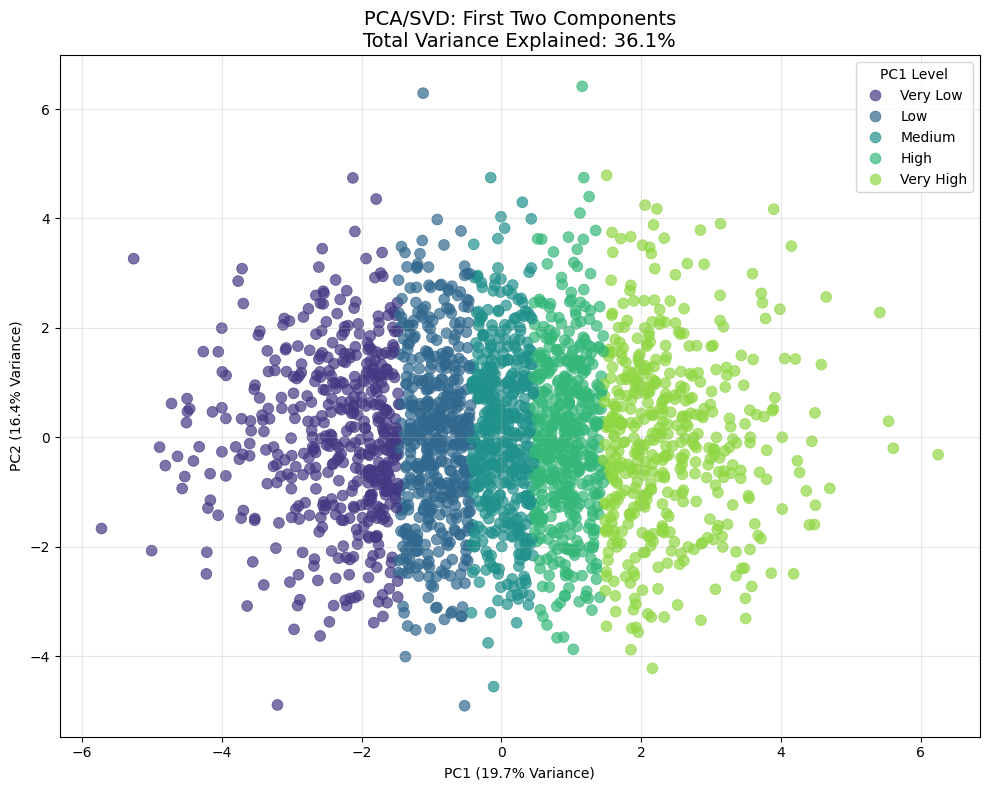


 Feature Loadings (from SVD Vt or PCA components):
            PC1_Loading  PC2_Loading
Feature_01       -0.324        0.202
Feature_02       -0.022        0.346
Feature_03       -0.298        0.110
Feature_04       -0.331        0.226
Feature_05       -0.127       -0.301
Feature_06        0.423        0.003
Feature_07       -0.228       -0.345
Feature_08       -0.305        0.114
Feature_09        0.262       -0.140
Feature_10        0.196        0.275
Feature_11        0.206        0.234
Feature_12       -0.091       -0.259
Feature_13        0.319        0.245
Feature_14        0.159        0.294
Feature_15       -0.267        0.436

 Interpretation:
PC1 is driven by: ['Feature_06', 'Feature_04', 'Feature_01']
PC2 is driven by: ['Feature_15', 'Feature_02', 'Feature_07']


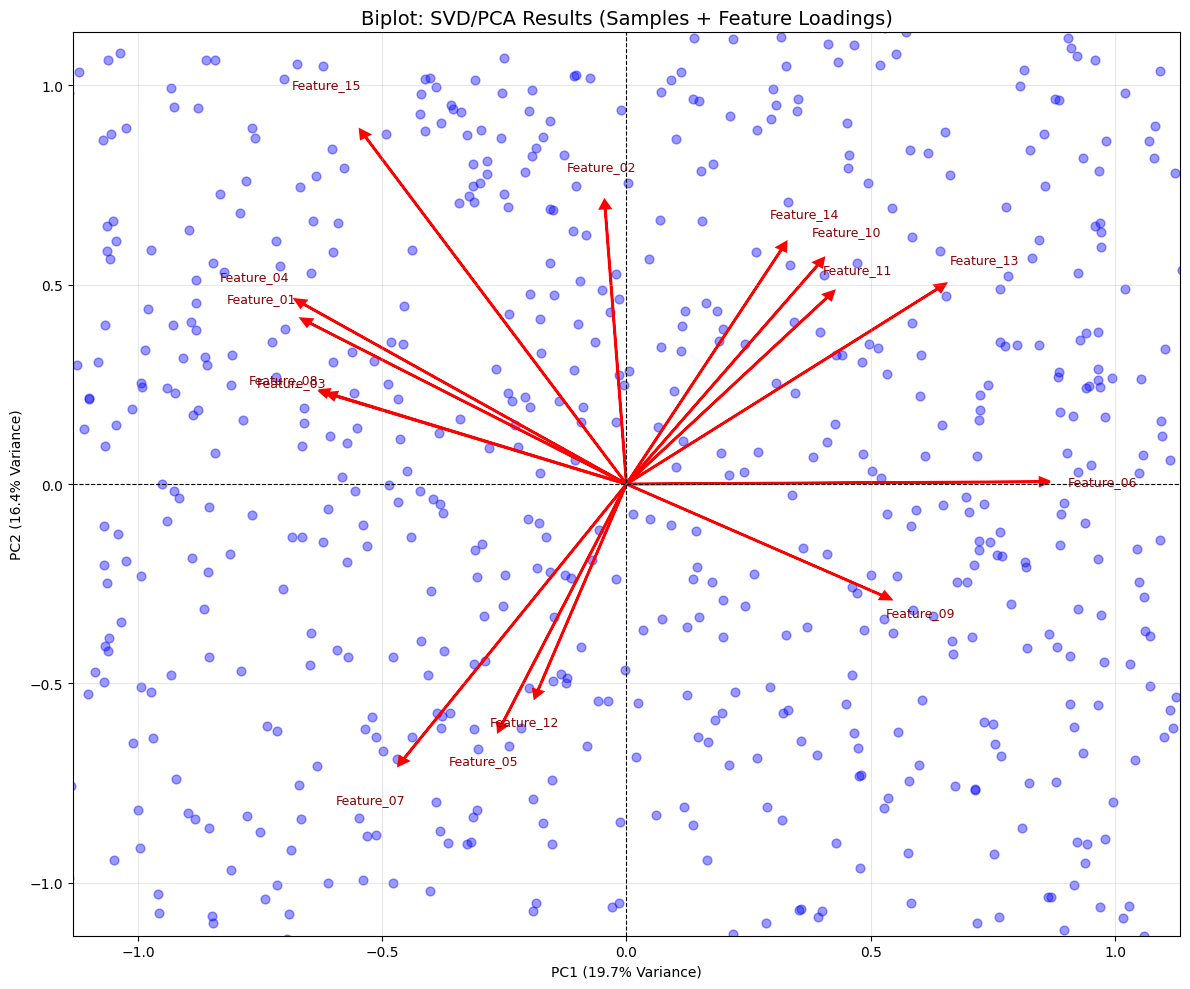

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Set style and seed
plt.style.use('default')
sns.set_palette("Set2")
np.random.seed(42)

# --------------------------------------------------
# 1. Generate Dataset (2300 × 15)
# --------------------------------------------------
n_samples = 2300
n_features = 15

# Create correlated features using multivariate normal
mean = np.random.uniform(-3, 3, n_features)
cov = np.random.randn(n_features, n_features)
cov = np.dot(cov, cov.T)  # Make positive semi-definite

data = np.random.multivariate_normal(mean, cov, size=n_samples)
df = pd.DataFrame(data, columns=[f'Feature_{i+1:02d}' for i in range(n_features)])

print(" Dataset Generated")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

# --------------------------------------------------
# 2. Standardize the Data (Zero Mean, Unit Variance)
# --------------------------------------------------
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)  # Shape: (2300, 15)
print(f"\n Data standardized (mean=0, std=1)")

# --------------------------------------------------
# 3. Apply PCA (via scikit-learn)
# --------------------------------------------------
pca = PCA(n_components=2)
pc_pca = pca.fit_transform(data_scaled)

# PCA explained variance
explained_ratio_pca = pca.explained_variance_ratio_
total_var_pca = explained_ratio_pca.sum()

print(f"\n PCA Results:")
print(f"PC1 Explained Variance: {explained_ratio_pca[0]:.4f} ({explained_ratio_pca[0]*100:.1f}%)")
print(f"PC2 Explained Variance: {explained_ratio_pca[1]:.4f} ({explained_ratio_pca[1]*100:.1f}%)")
print(f"Total (PC1 + PC2): {total_var_pca:.4f} ({total_var_pca*100:.1f}%)")

# --------------------------------------------------
# 4. Apply SVD Manually
# A = U @ Σ @ Vt
# --------------------------------------------------
U, singular_values, Vt = np.linalg.svd(data_scaled, full_matrices=False)

# Reconstruct Σ as diagonal matrix
Sigma = np.diag(singular_values)

# Compute SVD-based principal component scores: Scores = U @ Σ
pc_svd = U[:, :2] @ Sigma[:2, :2]  # First 2 components

# Explained variance from SVD
variance_svd = (singular_values ** 2) / (n_samples - 1)  # Eigenvalues of covariance matrix
explained_ratio_svd = variance_svd / variance_svd.sum()
total_var_svd = explained_ratio_svd[:2].sum()

print(f"\n SVD Results:")
print(f"PC1 Explained Variance: {explained_ratio_svd[0]:.4f} ({explained_ratio_svd[0]*100:.1f}%)")
print(f"PC2 Explained Variance: {explained_ratio_svd[1]:.4f} ({explained_ratio_svd[1]*100:.1f}%)")
print(f"Total (PC1 + PC2): {total_var_svd:.4f} ({total_var_svd*100:.1f}%)")

# --------------------------------------------------
# 5. Compare PCA and SVD Results
# --------------------------------------------------
# Check if scores are the same (allowing for sign flip)
is_pc1_close = np.allclose(pc_pca[:, 0], pc_svd[:, 0], atol=1e-10)
is_pc2_close = np.allclose(np.abs(pc_pca[:, 1]), np.abs(pc_svd[:, 1]), atol=1e-10)  # Sign may flip

print(f"\n PCA vs SVD Comparison:")
print(f"PC1 scores match? {is_pc1_close}")
print(f"PC2 scores (absolute) match? {is_pc2_close}")

# Loadings (Principal Component Directions)
loadings_pca = pca.components_  # Shape: (2, 15)
loadings_svd = Vt[:2, :]       # First 2 rows of Vt

print(f"Loadings match? {np.allclose(loadings_pca, loadings_svd, atol=1e-10, equal_nan=True)}")

# --------------------------------------------------
# 6. Create DataFrame for Plotting
# --------------------------------------------------
pc_df = pd.DataFrame({
    'PC1': pc_svd[:, 0],
    'PC2': pc_svd[:, 1],
    'Group': pd.qcut(pc_svd[:, 0], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
})

print(f"\n Final 2D DataFrame shape: {pc_df.shape}")

# --------------------------------------------------
# 7. Scatter Plot (SVD/PCA Results)
# --------------------------------------------------
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=pc_df, x='PC1', y='PC2',
    hue='Group', palette='viridis', alpha=0.7, s=60, edgecolor=None
)
plt.title(f'PCA/SVD: First Two Components\n'
          f'Total Variance Explained: {total_var_svd*100:.1f}%',
          fontsize=14)
plt.xlabel(f'PC1 ({explained_ratio_svd[0]*100:.1f}% Variance)')
plt.ylabel(f'PC2 ({explained_ratio_svd[1]*100:.1f}% Variance)')
plt.grid(True, alpha=0.3)
plt.legend(title='PC1 Level')
plt.tight_layout()
plt.show()

# --------------------------------------------------
# 8. Feature Loadings (Interpretation)
# --------------------------------------------------
loading_df = pd.DataFrame(
    Vt[:2, :].T,  # Transpose to have features as rows, PCs as columns
    columns=['PC1_Loading', 'PC2_Loading'],
    index=df.columns
)

print(f"\n Feature Loadings (from SVD Vt or PCA components):")
print(loading_df.round(3))

# Top contributors
top_pc1 = loading_df['PC1_Loading'].abs().nlargest(3).index
top_pc2 = loading_df['PC2_Loading'].abs().nlargest(3).index

print(f"\n Interpretation:")
print(f"PC1 is driven by: {list(top_pc1)}")
print(f"PC2 is driven by: {list(top_pc2)}")

# --------------------------------------------------
# 9. Biplot: Samples + Feature Vectors
# --------------------------------------------------
def biplot(U, Sigma, Vt, feature_names, scale_factor=2.0, figsize=(12, 10)):
    scores = U[:, :2] @ Sigma[:2, :2]  # PC1, PC2 scores
    loadings = Vt[:2, :]               # PC loadings

    fig, ax = plt.subplots(figsize=figsize)

    # Plot samples
    ax.scatter(scores[:, 0], scores[:, 1], c='blue', alpha=0.4, s=40, label='Samples')

    # Plot loading vectors
    for i, feature in enumerate(feature_names):
        x = loadings[0, i] * scale_factor
        y = loadings[1, i] * scale_factor
        ax.arrow(0, 0, x, y, head_width=0.02, head_length=0.02, fc='red', ec='red', linewidth=1.8)
        ax.text(x * 1.15, y * 1.15, feature, color='darkred', fontsize=9, ha='center', va='center')

    ax.set_xlabel(f'PC1 ({explained_ratio_svd[0]*100:.1f}% Variance)')
    ax.set_ylabel(f'PC2 ({explained_ratio_svd[1]*100:.1f}% Variance)')
    ax.set_title('Biplot: SVD/PCA Results (Samples + Feature Loadings)', fontsize=14)
    ax.axhline(0, color='black', linestyle='--', linewidth=0.8)
    ax.axvline(0, color='black', linestyle='--', linewidth=0.8)

    max_range = np.abs(loadings).max() * scale_factor * 1.3
    ax.set_xlim(-max_range, max_range)
    ax.set_ylim(-max_range, max_range)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Draw biplot
biplot(U, Sigma, Vt, df.columns, scale_factor=2.0)

In [4]:
import numpy as np
import pandas as pd
from itertools import combinations
from collections import defaultdict, Counter
import time

class Apriori:
    def __init__(self, min_support=0.01, min_confidence=0.5):
        self.min_support = min_support
        self.min_confidence = min_confidence
        self.frequent_itemsets = {}
        self.association_rules = []
    
    def _get_support(self, itemset, transactions):
        """Calculate support for an itemset"""
        count = 0
        for transaction in transactions:
            if set(itemset).issubset(set(transaction)):
                count += 1
        return count / len(transactions)
    
    def _has_infrequent_subset(self, candidate, frequent_itemsets_k_minus_1):
        """Check if any subset of candidate is infrequent"""
        for subset in combinations(candidate, len(candidate) - 1):
            if frozenset(subset) not in frequent_itemsets_k_minus_1:
                return True
        return False
    
    def _generate_candidates(self, frequent_itemsets_k_minus_1, k):
        """Generate candidate itemsets of size k"""
        candidates = set()
        frequent_list = list(frequent_itemsets_k_minus_1)
        
        for i in range(len(frequent_list)):
            for j in range(i + 1, len(frequent_list)):
                itemset1 = list(frequent_list[i])
                itemset2 = list(frequent_list[j])
                itemset1.sort()
                itemset2.sort()
                
                # Join step: if first k-2 elements are same
                if itemset1[:k-2] == itemset2[:k-2]:
                    candidate = frozenset(itemset1) | frozenset(itemset2)
                    if len(candidate) == k:
                        # Prune step: check if all subsets are frequent
                        if not self._has_infrequent_subset(candidate,
                                                           frequent_itemsets_k_minus_1):
                            candidates.add(candidate)
        
        return candidates
    
    def fit(self, transactions):
        """Find frequent itemsets using Apriori algorithm"""
        print(f"Starting Apriori with {len(transactions)} transactions")
        print(f"Minimum support: {self.min_support}")
        
        # Convert transactions to list of sets for faster lookup
        transaction_sets = [set(transaction) for transaction in transactions]
        
        # Get all unique items
        all_items = set()
        for transaction in transactions:
            all_items.update(transaction)
        
        print(f"Total unique items: {len(all_items)}")
        
        # Generate frequent 1-itemsets
        item_counts = Counter()
        for transaction in transactions:
            item_counts.update(transaction)
        
        total_transactions = len(transactions)
        frequent_1_itemsets = {}
        
        for item, count in item_counts.items():
            support = count / total_transactions
            if support >= self.min_support:
                frequent_1_itemsets[frozenset([item])] = support
        
        print(f"Frequent 1-itemsets: {len(frequent_1_itemsets)}")
        self.frequent_itemsets[1] = frequent_1_itemsets
        
        # Generate frequent k-itemsets (k >= 2)
        k = 2
        current_frequent_itemsets = frequent_1_itemsets
        
        while current_frequent_itemsets:
            print(f"Generating candidates for k={k}...")
            
            # Generate candidates
            candidates = self._generate_candidates(current_frequent_itemsets.keys(), k)
            print(f"Candidates generated: {len(candidates)}")
            
            if not candidates:
                break
            
            # Count support for candidates
            candidate_counts = defaultdict(int)
            for transaction in transaction_sets:
                for candidate in candidates:
                    if candidate.issubset(transaction):
                        candidate_counts[candidate] += 1
            
            # Filter by minimum support
            frequent_itemsets_k = {}
            for candidate, count in candidate_counts.items():
                support = count / total_transactions
                if support >= self.min_support:
                    frequent_itemsets_k[candidate] = support
            
            print(f"Frequent {k}-itemsets: {len(frequent_itemsets_k)}")
            
            if frequent_itemsets_k:
                self.frequent_itemsets[k] = frequent_itemsets_k
                current_frequent_itemsets = frequent_itemsets_k
                k += 1
            else:
                break
        
        print("Apriori completed!")
        return self
    
    def generate_rules(self):
        """Generate association rules from frequent itemsets"""
        self.association_rules = []
        
        # Generate rules from frequent itemsets of size >= 2
        for k in range(2, max(self.frequent_itemsets.keys()) + 1):
            for itemset, itemset_support in self.frequent_itemsets[k].items():
                # Generate all possible antecedent-consequent pairs
                for i in range(1, len(itemset)):
                    for antecedent in combinations(itemset, i):
                        antecedent = frozenset(antecedent)
                        consequent = frozenset(itemset - antecedent)
                        
                        # Calculate confidence
                        antecedent_support = self.frequent_itemsets[len(antecedent)][antecedent]
                        confidence = itemset_support / antecedent_support
                        
                        if confidence >= self.min_confidence:
                            rule = {
                                'antecedent': antecedent,
                                'consequent': consequent,
                                'support': itemset_support,
                                'confidence': confidence,
                                'lift': confidence / self.frequent_itemsets[len(consequent)][consequent]
                            }
                            self.association_rules.append(rule)
        
        return self.association_rules
    
    def get_frequent_itemsets(self):
        """Return all frequent itemsets"""
        return self.frequent_itemsets
    
    def get_rules(self):
        """Return association rules"""
        return self.association_rules

# Example usage with data
def create_sample_data(n_transactions=7499, n_entities=7508, avg_items_per_transaction=10):
    """Create sample transaction data"""
    print("Creating sample dataset...")
    transactions = []
    
    # Create a list of entity names
    entities = [f"item_{i}" for i in range(n_entities)]
    
    # Generate transactions
    np.random.seed(42)  # For reproducibility
    
    for _ in range(n_transactions):
        # Random number of items per transaction (1 to avg_items_per_transaction*2)
        n_items = np.random.randint(1, min(avg_items_per_transaction * 3, n_entities))
        
        # Randomly select items
        selected_items = np.random.choice(entities, size=n_items, replace=False)
        transactions.append(list(selected_items))
    
    return transactions

# Main execution
if __name__ == "__main__":
    # Create sample data (you would load your actual data here)
    print("=== Apriori Algorithm Example ===")
    transactions = create_sample_data(7499, 7508, 15)
    
    # Initialize and run Apriori
    start_time = time.time()
    
    apriori = Apriori(min_support=0.005, min_confidence=0.1)  
    # Lower support for large dataset
    apriori.fit(transactions)
    
    end_time = time.time()
    print(f"\nExecution time: {end_time - start_time:.2f} seconds")
    
    # Display results
    print("\n=== FREQUENT ITEMSETS ===")
    total_frequent = 0
    for k, itemsets in apriori.get_frequent_itemsets().items():
        print(f"{k}-itemsets: {len(itemsets)}")
        total_frequent += len(itemsets)
        
        # Show top 5 itemsets for each size
        if k <= 3:  # Only show for small itemsets for readability
            print("  Examples:")
            sorted_itemsets = sorted(itemsets.items(), key=lambda x: x[1], reverse=True)
            for itemset, support in sorted_itemsets[:5]:
                print(f"    {set(itemset)} (support: {support:.4f})")
        print()
    
    print(f"Total frequent itemsets: {total_frequent}")
    
    # Generate and display association rules
    print("=== ASSOCIATION RULES ===")
    rules = apriori.generate_rules()
    print(f"Total association rules: {len(rules)}")
    
    # Show top 10 rules by confidence
    sorted_rules = sorted(rules, key=lambda x: x['confidence'], reverse=True)
    print("\nTop 10 rules by confidence:")
    for i, rule in enumerate(sorted_rules[:10]):
        antecedent = ', '.join(sorted(list(rule['antecedent'])))
        consequent = ', '.join(sorted(list(rule['consequent'])))
        print(f"{i+1}. {antecedent} => {consequent}")
        print(f" Support: {rule['support']:.4f}, Confidence: {rule['confidence']:.4f}, Lift: {rule['lift']:.4f}")
        print()

# Alternative implementation using mlxtend (more efficient for large datasets)
def apriori_with_mlxtend():
    """Alternative implementation using mlxtend library"""
    try:
        from mlxtend.frequent_patterns import apriori, association_rules
        from mlxtend.preprocessing import TransactionEncoder
        import pandas as pd
        
        print("\n=== Using mlxtend library ===")
        
        # Create sample data
        transactions = create_sample_data(1000, 100, 8)  # Smaller sample for demonstration
        
        # Transform data
        te = TransactionEncoder()
        te_ary = te.fit(transactions).transform(transactions)
        df = pd.DataFrame(te_ary, columns=te.columns_)
        
        # Run Apriori
        frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)
        print("Frequent itemsets (top 10):")
        print(frequent_itemsets.head(10))
        
        # Generate rules
        if len(frequent_itemsets) > 1:
            rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
            print("\nAssociation rules (top 5):")
            print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())
        
    except ImportError:
        print("mlxtend not installed. Install with: pip install mlxtend")

# Uncomment to use mlxtend implementation
# apriori_with_mlxtend()

=== Apriori Algorithm Example ===
Creating sample dataset...
Starting Apriori with 7499 transactions
Minimum support: 0.005
Total unique items: 7508
Frequent 1-itemsets: 7
Generating candidates for k=2...
Candidates generated: 21
Frequent 2-itemsets: 0
Apriori completed!

Execution time: 0.04 seconds

=== FREQUENT ITEMSETS ===
1-itemsets: 7
  Examples:
    {'item_6602'} (support: 0.0053)
    {'item_5550'} (support: 0.0053)
    {'item_6494'} (support: 0.0052)
    {'item_5845'} (support: 0.0052)
    {'item_3605'} (support: 0.0052)

Total frequent itemsets: 7
=== ASSOCIATION RULES ===
Total association rules: 0

Top 10 rules by confidence:


In [5]:
# Import necessary libraries
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd
import numpy as np
import random

# Set random seed for reproducibility
np.random.seed(42)

# Define a set of grocery items
items = [
    'Milk', 'Bread', 'Butter', 'Eggs', 'Cheese', 'Yogurt', 'Cereal', 'Pasta',
    'Rice', 'Apples', 'Bananas', 'Oranges', 'Chicken', 'Beef', 'Fish', 'Tomatoes',
    'Potatoes', 'Onions', 'Carrots', 'Lettuce'
]

# Generate a synthetic dataset with 1,000 transactions
num_transactions = 1000
dataset = []
for _ in range(num_transactions):
    # Randomly select 2 to 8 items per transaction
    num_items = random.randint(2, 8)
    transaction = random.sample(items, num_items)
    dataset.append(transaction)

# Convert the dataset into a one-hot encoded DataFrame
encoded_vals = []
for transaction in dataset:
    labels = {item: 0 for item in items}
    for item in transaction:
        labels[item] = 1
    encoded_vals.append(labels)

# Create a DataFrame
encoded_df = pd.DataFrame(encoded_vals)

# Apply the Apriori algorithm with a lower min_support
min_support = 0.05  # Lowered to capture more itemsets
frequent_itemsets = apriori(encoded_df, min_support=min_support, use_colnames=True)

# Check if frequent itemsets were found
if frequent_itemsets.empty:
    print("No frequent itemsets found. Try lowering the min_support threshold.")
else:
    print("Frequent Itemsets (support >= 0.05):")
    print(frequent_itemsets.sort_values(by='support', ascending=False).head(10))

    # Generate association rules with a lower min_confidence
    min_confidence = 0.3  # Lowered to generate more rules
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

    # Check if rules were generated
    if rules.empty:
        print("No association rules found. Try lowering the min_confidence threshold or min_support.")
    else:
        print("\nAssociation Rules (confidence >= 0.3):")
        print(rules[['antecedents', 'consequents', 'support', 
                     'confidence', 'lift']].head(10))

        # Filter rules involving Milk
        milk_antecedent = rules[rules['antecedents'].apply(lambda x: 'Milk' in x)]
        milk_consequent = rules[rules['consequents'].apply(lambda x: 'Milk' in x)]

        # Display Milk-related rules
        print("\nRules where Milk is an antecedent:")
        if milk_antecedent.empty:
            print("No rules found where Milk is an antecedent.")
        else:
            print(milk_antecedent[['antecedents', 'consequents', 'support', 
                                   'confidence', 'lift']])

        print("\nRules where Milk is a consequent:")
        if milk_consequent.empty:
            print("No rules found where Milk is a consequent.")
        else:
            print(milk_consequent[['antecedents', 'consequents', 'support', 
                                   'confidence', 'lift']])

        # Summarize antecedents and consequents of Milk
        antecedents_of_milk = milk_consequent['antecedents'].apply(lambda x: list(x)).tolist()
        consequents_of_milk = milk_antecedent['consequents'].apply(lambda x: list(x)).tolist()

        print("\nSummary:")
        print("Antecedents of Milk (items predicting Milk):", 
              [item for sublist in antecedents_of_milk for item in sublist] or "None")
        print("Consequents of Milk (items predicted by Milk):", 
              [item for sublist in consequents_of_milk for item in sublist] or "None")

Frequent Itemsets (support >= 0.05):
    support    itemsets
3     0.271      (Eggs)
8     0.266      (Rice)
19    0.266   (Lettuce)
18    0.263   (Carrots)
14    0.260      (Fish)
16    0.260  (Potatoes)
6     0.257    (Cereal)
7     0.257     (Pasta)
5     0.257    (Yogurt)
12    0.254   (Chicken)

Association Rules (confidence >= 0.3):
  antecedents consequents  support  confidence      lift
0      (Milk)   (Bananas)    0.071    0.304721  1.214028
1      (Milk)   (Carrots)    0.076    0.326180  1.240229
2     (Bread)   (Chicken)    0.071    0.303419  1.194562
3    (Cheese)      (Eggs)    0.076    0.304000  1.121771
4    (Apples)      (Eggs)    0.078    0.342105  1.262381
5  (Tomatoes)      (Eggs)    0.076    0.301587  1.112868
6   (Carrots)      (Eggs)    0.081    0.307985  1.136475
7    (Cheese)   (Bananas)    0.075    0.300000  1.195219
8      (Rice)    (Yogurt)    0.081    0.304511  1.184869
9    (Yogurt)      (Rice)    0.081    0.315175  1.184869

Rules where Milk is an antecede

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
